<a href="https://colab.research.google.com/github/AkaluTeklu/Breast-Cancer-Wisconsin-Diagnostic-ML-model/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this comprehensive project, we undertake an end-to-end machine learning process, covering various crucial aspects:



1. Data Description:
   Provided a thorough description of the dataset, including its features, structure, and the nature of the target variable.


2. Data Tidying and Preparation for Analysis:
   Conducted data preprocessing to ensure the dataset is in a clean and analyzable format, addressing missing values, outliers, and other data quality issues.


3. Dealing with Data Imbalance:
   Formulated a strategy to address any imbalance in the dataset, employing techniques such as Upsampling, Downsampling, and  using advanced methods like Synthetic Minority Over-sampling Technique (SMOTE).


4. Exploratory Visual Data Analysis:
   Presented visualizations to gain insights into the distribution, patterns, and relationships within the dataset, facilitating a better understanding of the underlying data.


5. Results and Remarks from Clustering Analysis:
   Demonstrated findings and insights derived from clustering analysis, highlighted any discernible patterns or groupings within the data.


6. Principal Component Analysis:
   Evaluated the potential benefits of Principal Component Analysis


7. Data Splitting:
   Splitted the dataset into training and testing sets, ensuring a robust evaluation of model performance.


8. Modeling Using Simple and Ensemble Techniques:
   Implemented machine learning models, both individually and in ensemble, to explore various approaches and techniques for predicting the target variable.


9. Validation with Appropriate Metrics:
   Employed suitable evaluation metrics to validate the models, ensuring a robust assessment of their performance and generalization capabilities.


10. dentifying Causes of Inaccuracies and Improvement Options: Investigated potential causes of inaccuracies in model predictions and presenting viable options for enhancing accuracy.

### Loading packages

In [5]:
invisible(devtools::install_github("cran/DMwR"))
invisible(install.packages(c("class", "rpart", "naivebayes", "e1071", "caret", "randomForest","kernlab",'NbClust')))
invisible(install.packages(c("neuralnet",'mlbench', 'dplyr', 'corrplot', 'lattice', 'ggplot2', 'tidyverse', 'ROSE', 'corrgram')))

Skipping install of 'DMwR' from a github remote, the SHA1 (6fd4f0cd) has not changed since last install.
  Use `force = TRUE` to force installation

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
#Loading the all required packages
library(neuralnet)
library(mlbench)
library("dplyr")
library(tidyverse)
library(caret)
library(lattice)
library(corrplot)
library(ggplot2)
library(randomForest)
library(e1071)
library(kernlab)
library(class)
library(rpart)
library(e1071)
library(naivebayes)
library(caret)

library(DMwR)
library(corrgram)


Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘corrgram’


The following object is masked from ‘package:lattice’:

    panel.fill




## Upload the Breast Cancer Wisconsin

In [6]:

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Attempt to read the data
data <- read.table(url, sep = ",")


In [4]:
head(data)
str(data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


'data.frame':	569 obs. of  32 variables:
 $ V1 : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ V2 : chr  "M" "M" "M" "M" ...
 $ V3 : num  18 20.6 19.7 11.4 20.3 ...
 $ V4 : num  10.4 17.8 21.2 20.4 14.3 ...
 $ V5 : num  122.8 132.9 130 77.6 135.1 ...
 $ V6 : num  1001 1326 1203 386 1297 ...
 $ V7 : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ V8 : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ V9 : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ V10: num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ V11: num  0.242 0.181 0.207 0.26 0.181 ...
 $ V12: num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ V13: num  1.095 0.543 0.746 0.496 0.757 ...
 $ V14: num  0.905 0.734 0.787 1.156 0.781 ...
 $ V15: num  8.59 3.4 4.58 3.44 5.44 ...
 $ V16: num  153.4 74.1 94 27.2 94.4 ...
 $ V17: num  0.0064 0.00522 0.00615 0.00911 0.01149 ...
 $ V18: num  0.049 0.0131 0.0401 0.0746 0.0246 ...
 $ V19: num  0.0537 0.0186 0.0383 0.0566 0.0569 ...
 $ V20: num  0.0159 0.01

As we can observe, there are 32 columns of them V1 and V2 are catagorical objects which represents the ID number and the target variable. Therefore, we need to exclude the ID number and rename the columns in the data preparation section.

## Data preparation

In [7]:
data <- data[,-1]

nam <- c("Radius", "Texture", "Perimeter", "Area", "Smoothness",
         "Compactness", "Concavity", "ConcPoints", "Symmetry", "FractDim")

colnames(data) <- c("Diagnosis", paste0(nam, "M"), paste0(nam, "Err"), paste0(nam, "WL"))

rm(nam)


In the first line, ID column is removed from further consideration. Next line prepares manually the character
vector, which will be used to set the columns names (in the third line). As output line is already a factor
variable, and all inputs ones are numeric, no transformations are needed.

 Here are 30 numeric parameters linearly independent - Average, mean error, ”worst” or largest case for 10 features listed below:

 1. Radius (mean of distances from center to points on the perimeter)

 2. Texture (standard deviation of gray-scale values)

 3. Perimeter

 4. Area

 5. Smoothness (local variation in radius lengths)

 6. Compactness (perimeter^2 / area - 1)

 7. Concavity (severity of concave portions of the contour)

 8. Concave points (number of concave portions of the contour)

 9. Symmetry

10. Fractal dimension ("coastline approximation" - 1)


These features were determined from digital FNA images of breast tissue; they describe the characteristics of the cell nuclei visible in the image.


In [6]:
head(data)
summary(data$Diagnosis)

,Diagnosis,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcPointsM,SymmetryM,⋯,RadiusWL,TextureWL,PerimeterWL,AreaWL,SmoothnessWL,CompactnessWL,ConcavityWL,ConcPointsWL,SymmetryWL,FractDimWL
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


   Length     Class      Mode 
      569 character character 

#### Checking missing value

In [8]:
#Checking the number of missing value(NA)
numberOfNA <- length(which(is.na(data)==TRUE))
if(numberOfNA>0) {
data <- housing[complete.cases(data),]
}
sum(complete.cases(data))

[1] 569

There is no missing value in the data.

In [9]:
summary(data)

  Diagnosis            RadiusM          TextureM       PerimeterM    
 Length:569         Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 Class :character   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
 Mode  :character   Median :13.370   Median :18.84   Median : 86.24  
                    Mean   :14.127   Mean   :19.29   Mean   : 91.97  
                    3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
                    Max.   :28.110   Max.   :39.28   Max.   :188.50  
     AreaM         SmoothnessM       CompactnessM       ConcavityM     
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.00000  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.06154  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.08880  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070  
 Max.   :2501.0   Max.   :0.16340   Max.   :0.34540   Max.   :0.42680  
  Conc

From the above descrptive statistics, we can see that variable ‘Area’  have a large difference between their median and mean which indicates lot of outliers. Besides, the there is imbalance in the target variable as shown above, around 67% cases are benign, and the rest 37% are malignant.

In [8]:
data$Diagnosis <- as.numeric(as.factor(data$Diagnosis))
count_diagnosis <- table(data$Diagnosis)

In [9]:
count_diagnosis


  1   2 
357 212 

## Exploratory Data Analysis

In this section, we will use some visualizations techniques  to understand the relationship of the target variable with other features as well as the correlation between the each feature attributes.

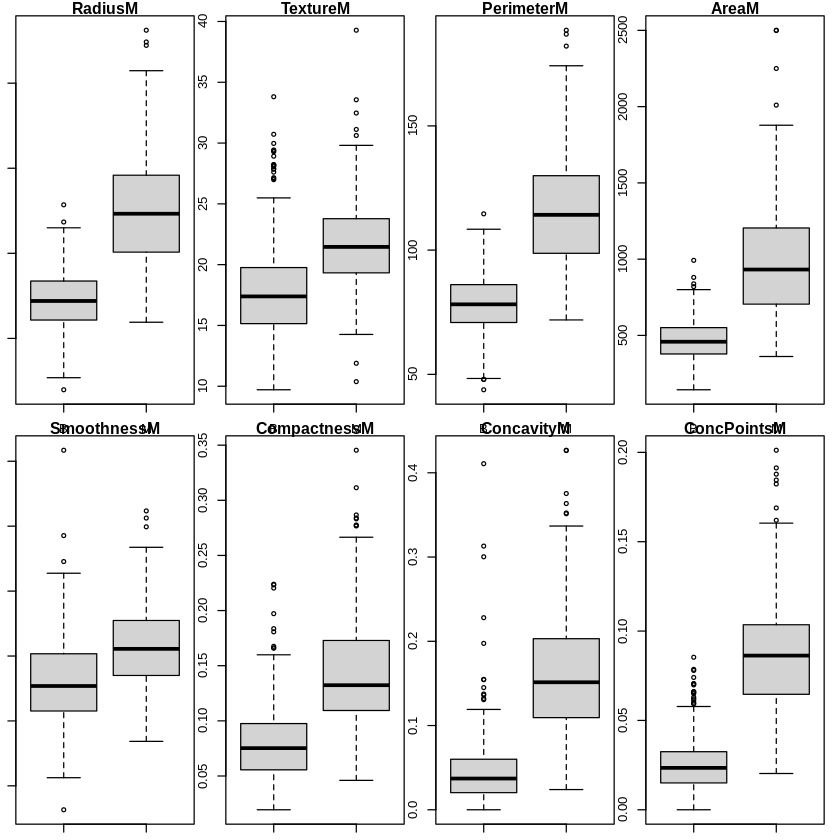

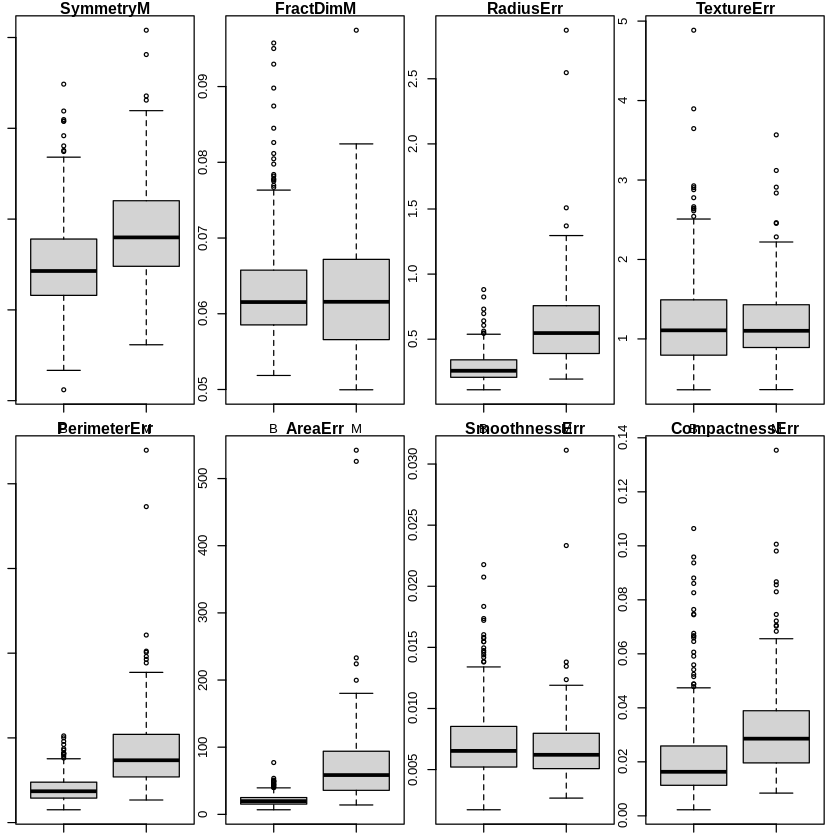

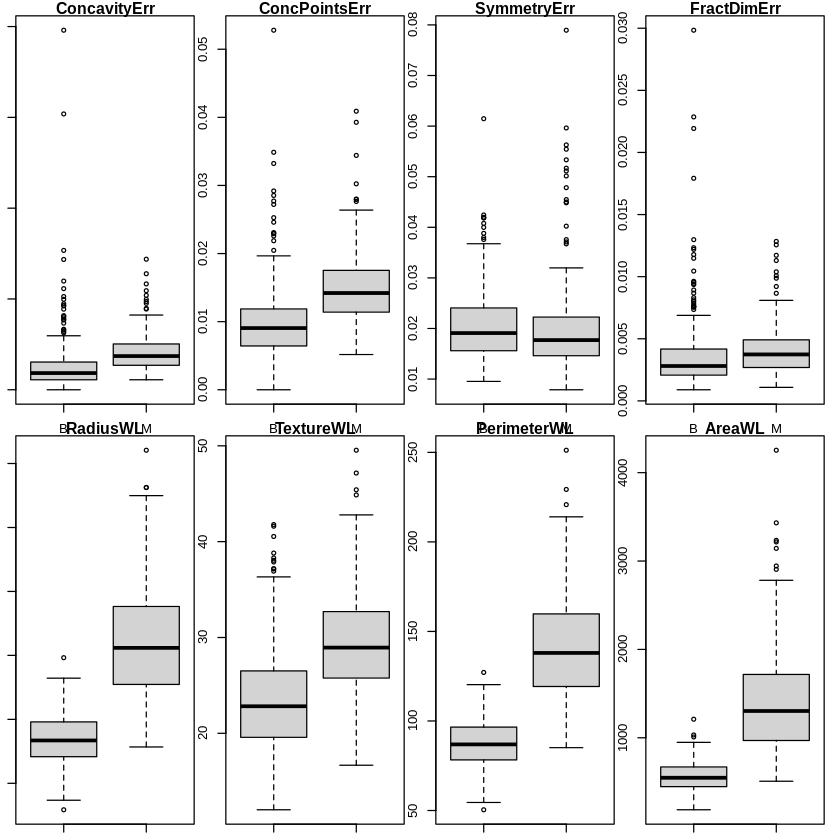

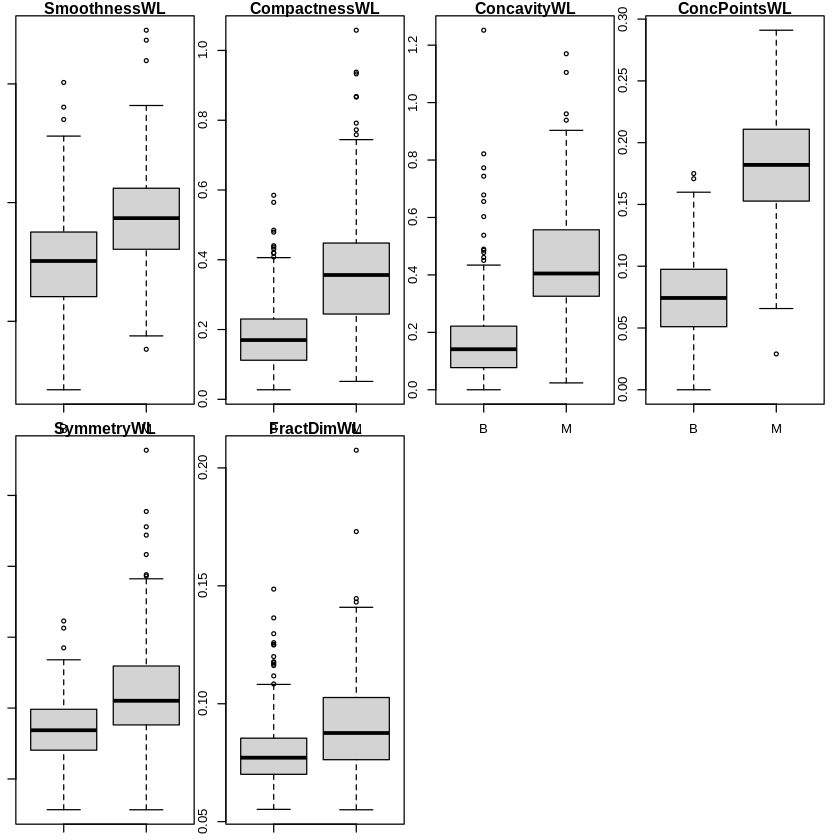

In [11]:
par(mfrow = c(2, 4), mar = rep(1,4))


# Figure 1 – Boxplot (first)
for(i in 1:16) {
   boxplot(data[[i+1]] ~ Diagnosis, data, main=names(data)[i+1])
}; rm(i)

# Figure 2 – Boxplot (second)
for(i in 1:14) {
   boxplot(data[[i+17]] ~ Diagnosis, data, main=names(data)[i+17])
}; rm(i)




As we can see the feature variables have outliers.

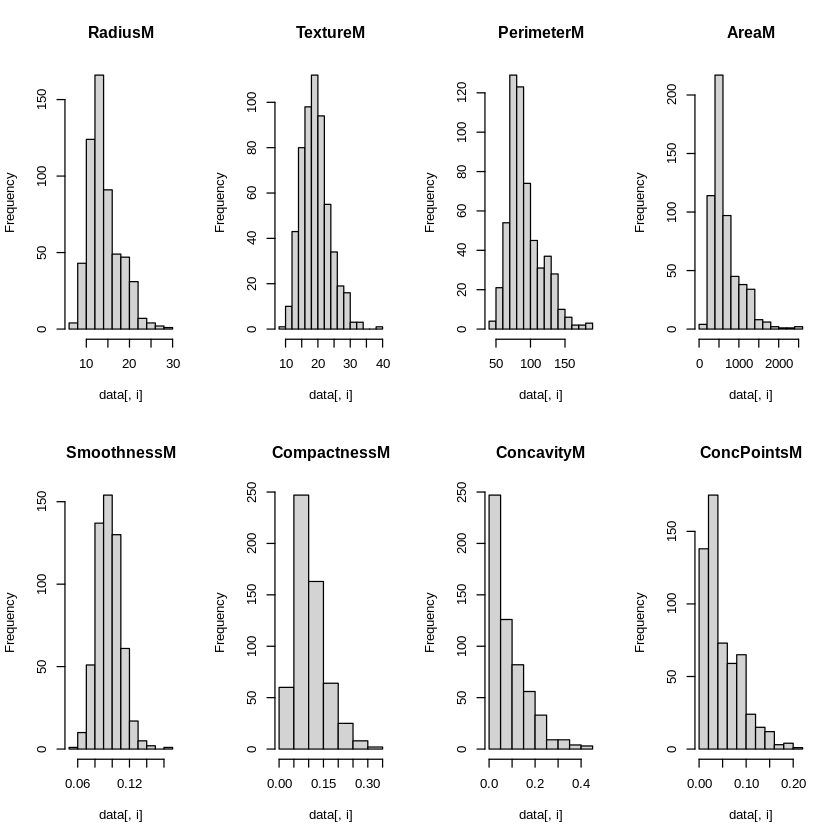

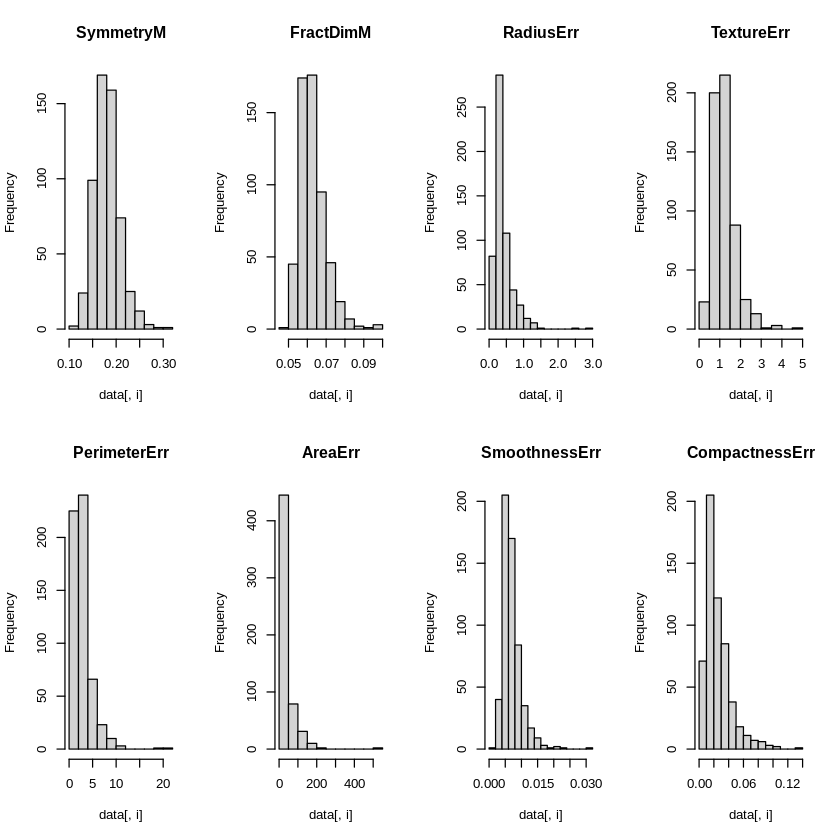

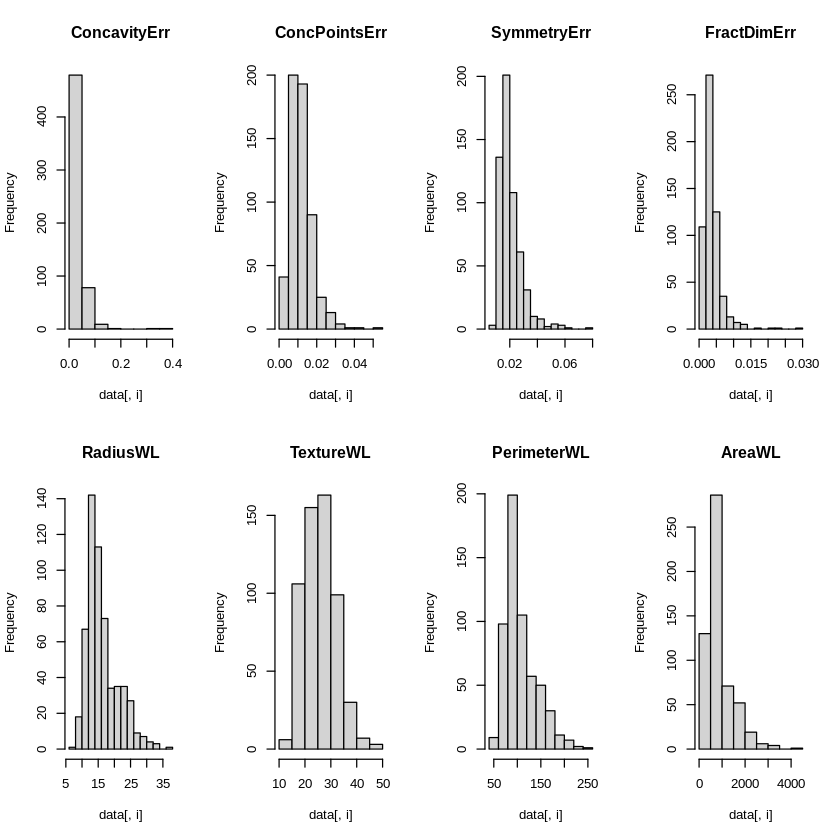

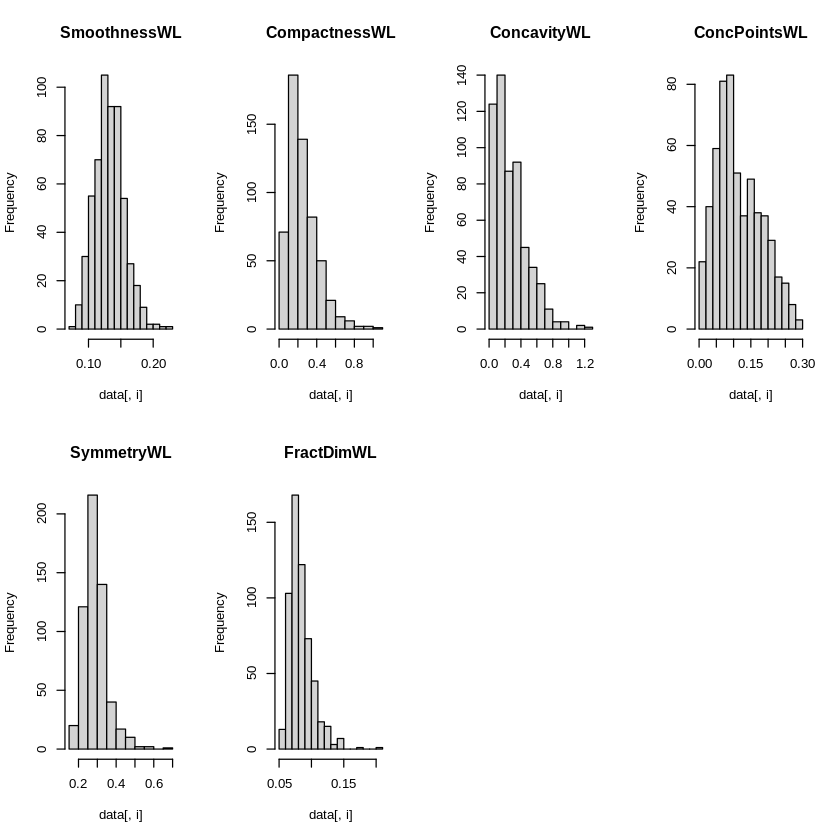

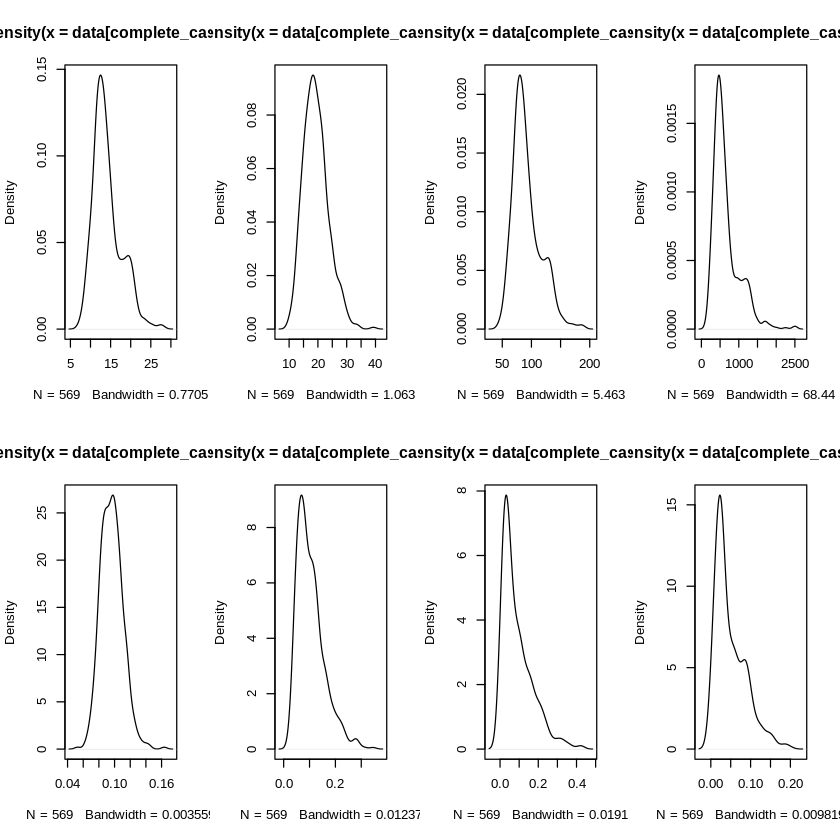

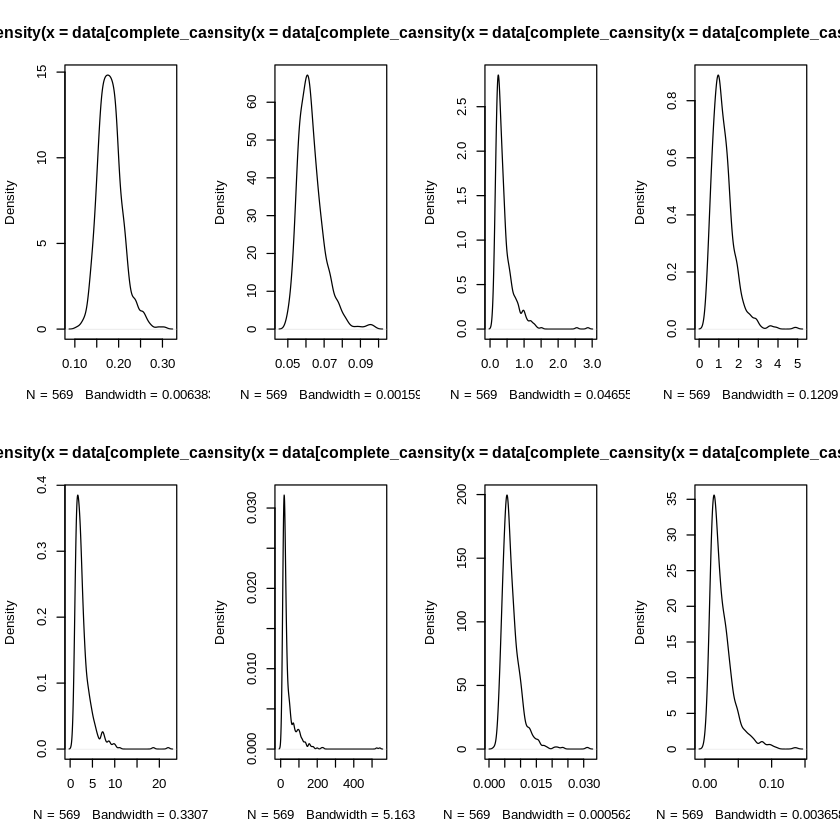

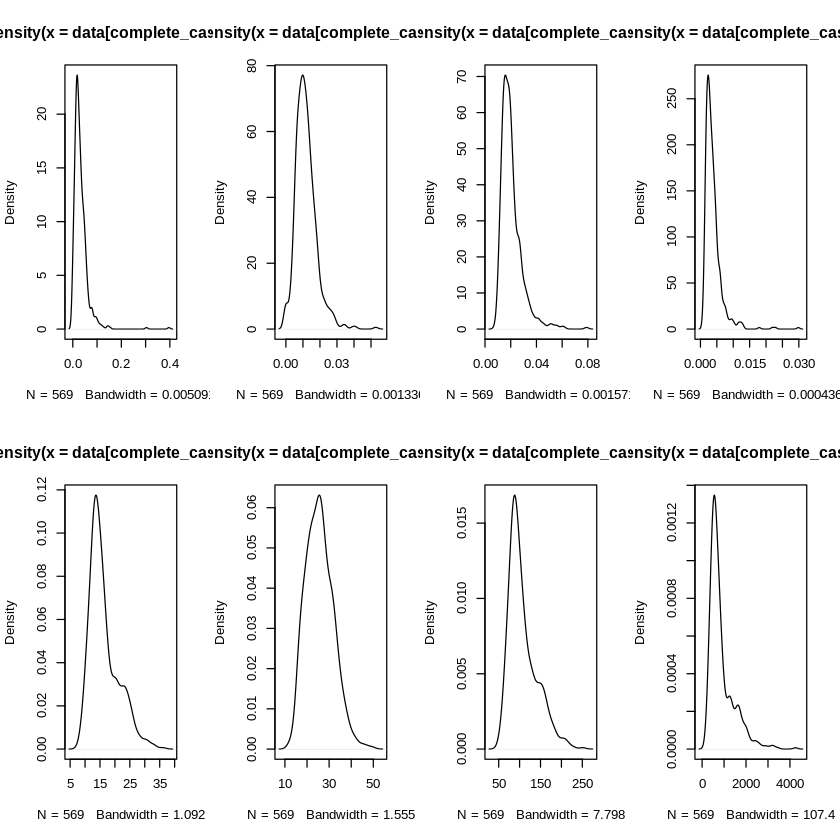

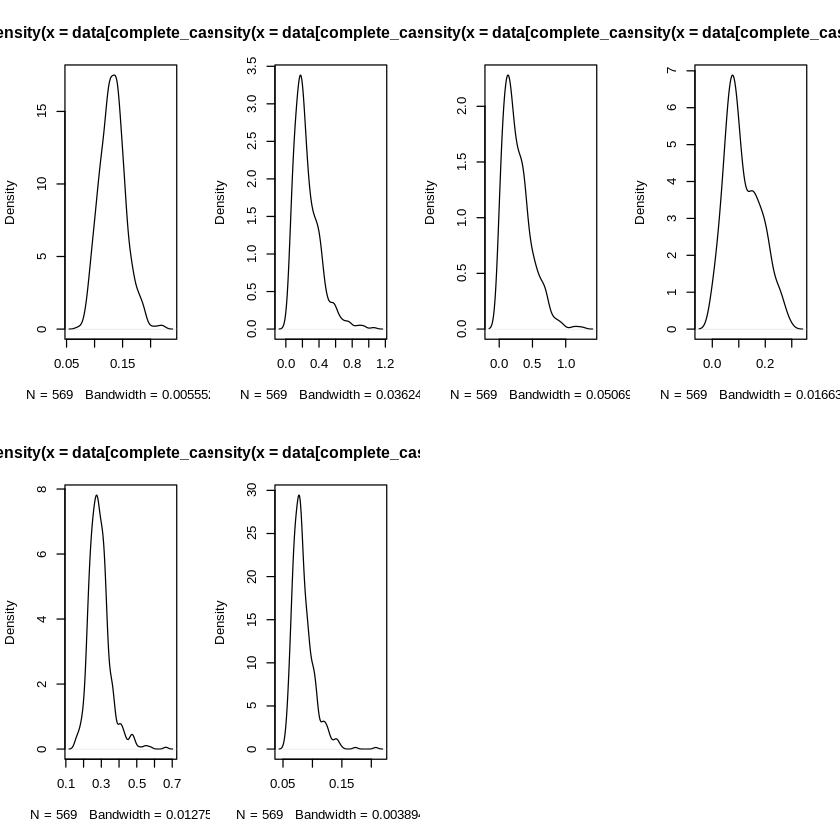

In [12]:
# histograms each attribute

par(mfrow=c(2,4))
for(i in 2:31) {
hist(data[,i], main=names(data)[i])
}

# density plot for each attribute

par(mfrow=c(2,4))
complete_cases <- complete.cases(data)
for(i in 2:31) {
plot(density(data[complete_cases,i]), main=names(dataset)[i])
}

We can see that almost all of the distributions have an exponential or bimodal shape to them. We may benefit from log transforms or other power transforms later on.

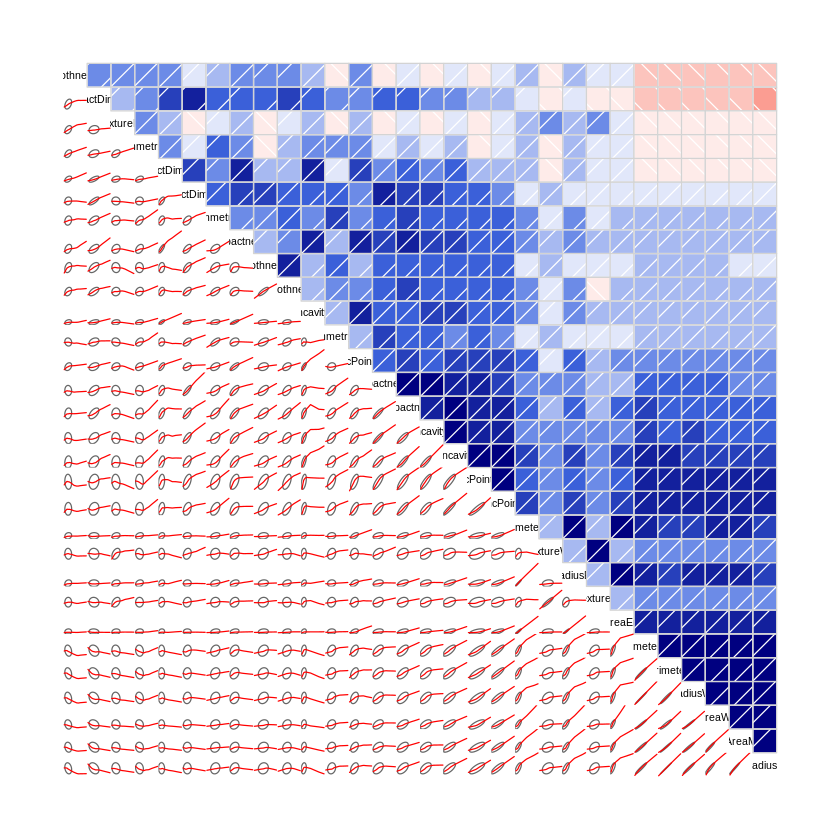

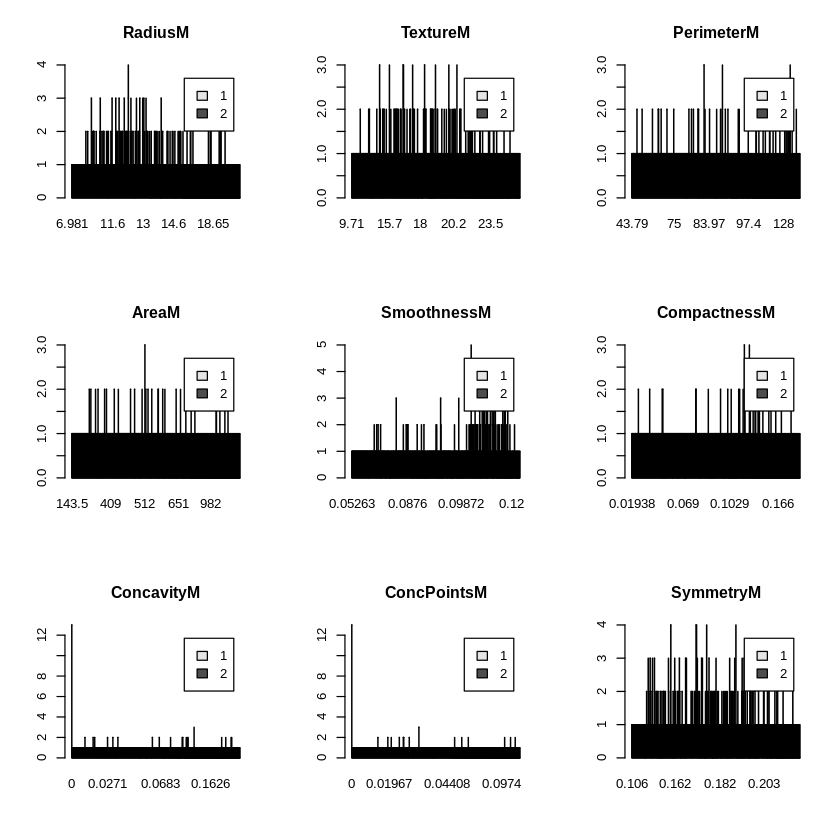

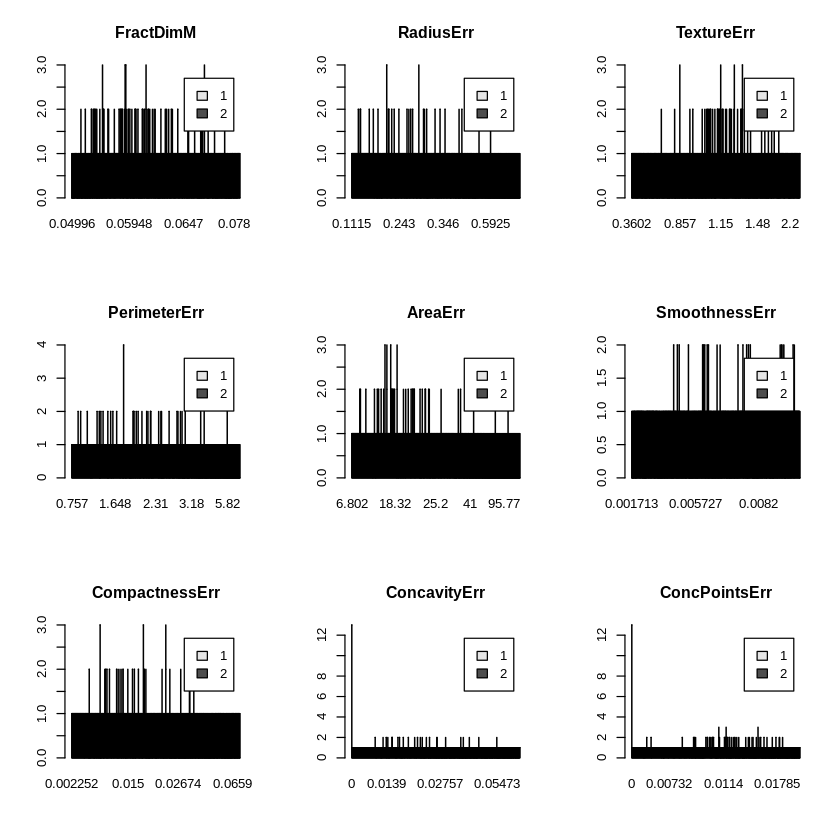

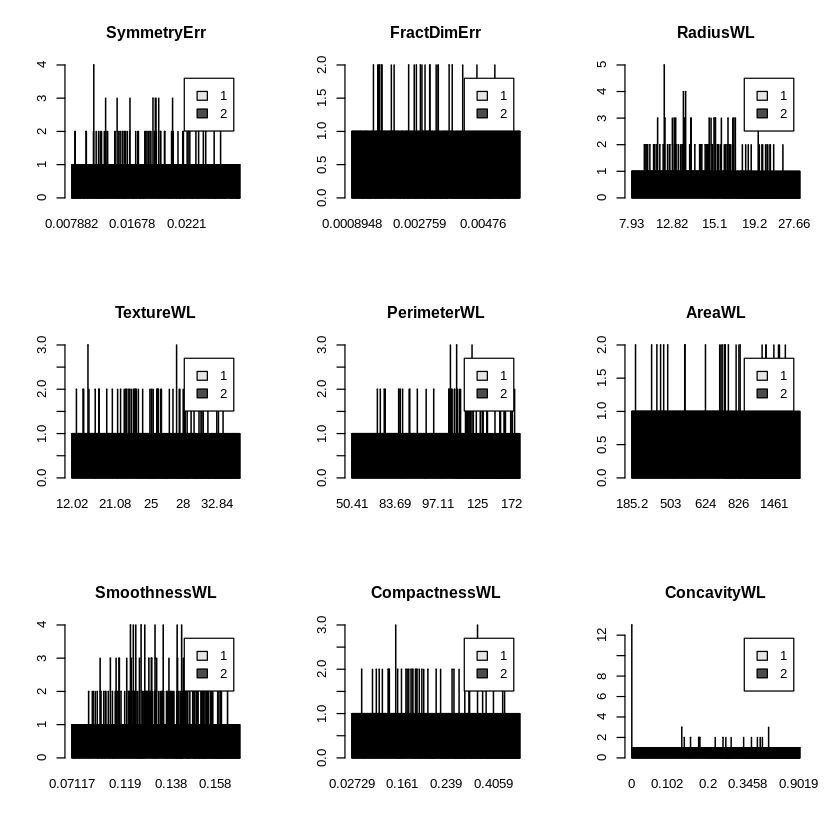

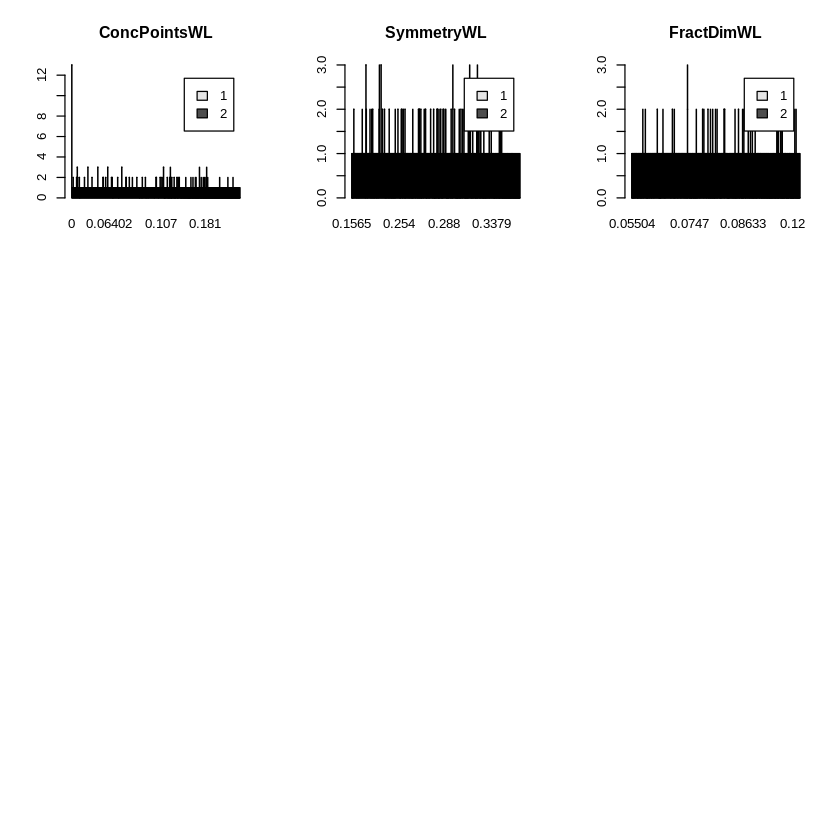

In [10]:
# Figure 3 - Correlogram
par(mfrow=c(1,1))
corrgram(data[,-1], order=TRUE, lower.panel=panel.ellipse,
          upper.panel=panel.shade, text.panel=panel.txt)

# bar plots of each variable by class

par(mfrow=c(3,3))
for(i in 2:31) {
barplot(table(data$Diagnosis, data[, i]), main = names(data)[i], legend.text = unique(data$Diagnosis))

}

Because the data is discrete, we can use bar plots to get an idea of the interaction of the
distribution of each attribute and how they breakdown by class value. This gives us a more nuanced idea of how the benign values clustered at the left (smaller
values) of each distribution and malignant all over the place.
Hence, the correlation between the feature variable, as observed some of the predicators exhibit strong relationship. For instance, RadiusM have strong correlation with PerimeterM, AreaM, radiusWL etc...In such case feature extraction is needed.

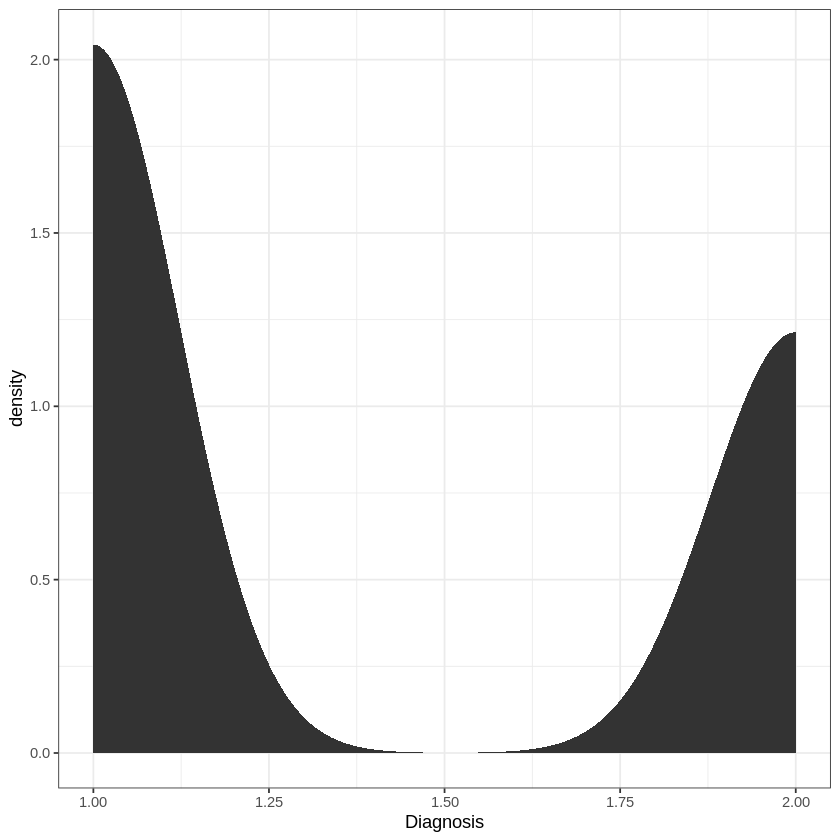

In [11]:
#Density plot of the target variable
data%>%
ggplot(aes(Diagnosis)) +
stat_density() +
theme_bw()

The density plot of the target variable seems bimodal distributed.

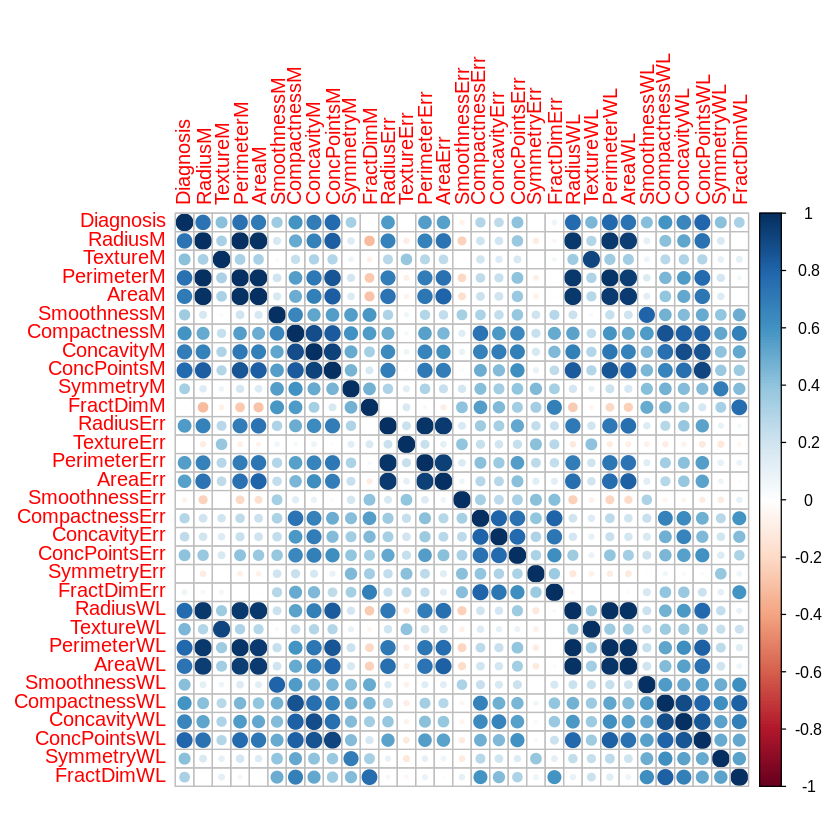

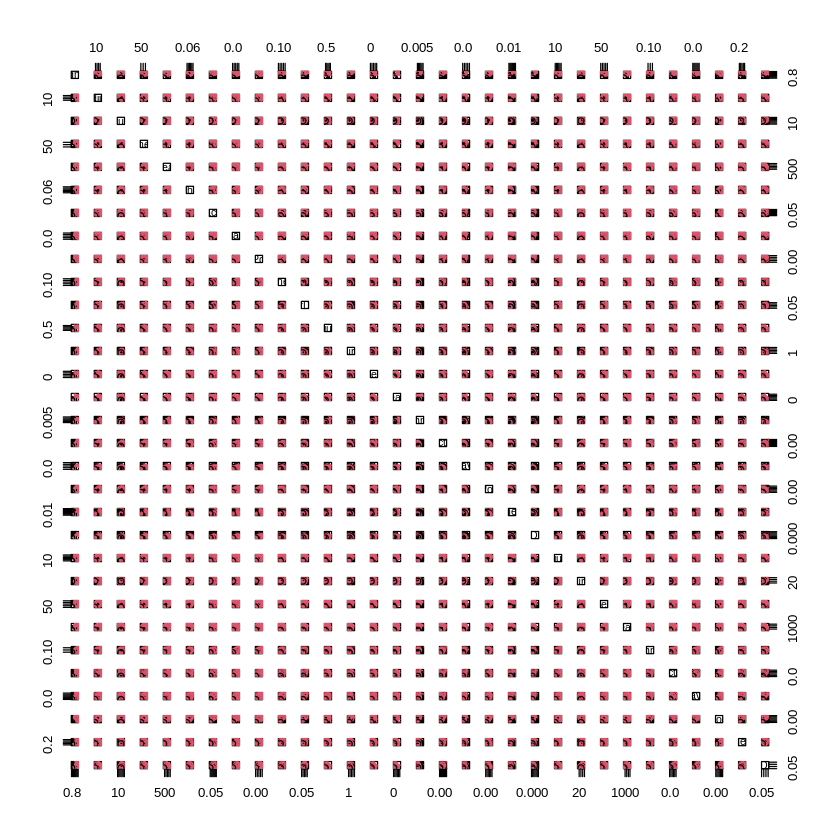

In [14]:
# The correlation between target variable and input features
corrplot(cor(data))

jittered_x <- sapply(data[,1:31], jitter)
pairs(jittered_x, names(data[,1:31]), col=data$Diagnosis)

Here, the correlation between the target variable (Diagnosis) and the feature variables is presented. Observing the correlogram, it indicates a strong correlation between the target variable and features such as radiusM, perimeterM, radiusWL, etc. Conversely, features like textureErr, FractDimM, and smoothnessErr seem to exhibit weaker correlations with the target variable. Consequently, these less impactful features may be considered for removal.

## Principal Component Analysis

PCA prohibits predictive algorithms from having problems with data overfitting by eliminating superfluous correlated variables.Moreover, it plays a significant role in data exploration and visualization, aiding in uncovering hidden patterns and insights.

In [26]:
pca1 <- prcomp(data[,-1], center = TRUE, scale. = TRUE)
summary(pca1)
pca2 <- prcomp(data[,-1], center = FALSE, scale. = FALSE)
summary(pca2)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

Importance of components:
                             PC1       PC2      PC3      PC4     PC5   PC6
Standard deviation     1291.7705 104.07719 36.94340 23.29246 6.42570 2.404
Proportion of Variance    0.9924   0.00644  0.00081  0.00032 0.00002 0.000
Cumulative Proportion     0.9924   0.99884  0.99965  0.99997 1.00000 1.000
                         PC7    PC8    PC9   PC10   PC11    PC12    PC13
Standard deviation     1.353 0.6105 0.4126 0.2967 0.1857 0.09255 0.05913
Proportion of Variance 0.000 0.0000 0.0000 0.0000 0.0000 0.00000 0.00000
Cumulative Proportion  1.000 1.0000 1.0000 1.0000 1.0000 1.00000 1.00000
                          PC14    PC15    PC16    PC17    PC18    PC19   PC20
Standard deviation     0.04906 0.03642 0.02596 0.01992 0.01936 0.01376 0.0129
Proportion of Variance 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.0000
Cumulative Proportion  1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.0000
                           PC21     PC22     PC23     PC24     PC25   

For exploration purposes, PCA analysis was also carried out in two variants:
• with normalization,
• without normalization.

PCA showed, that 95% of parameters variability is explained by:

• the first 10 components when using normalized data – returns better variablity,
• only first component (without normalization) – worse case (too less, most probably caused by the values range in a specific column).

## Clustering

A preliminary check, of how many groups the automatic algorithm would divide the data, can be done
using the NbClust() function; then the data will be checked for 30 different criteria (the Euclidean method
was used to determine the distance; the optimal number of groups is searched in the range 2-4):

[1] "Frey index : No clustering structure in this data set"
*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


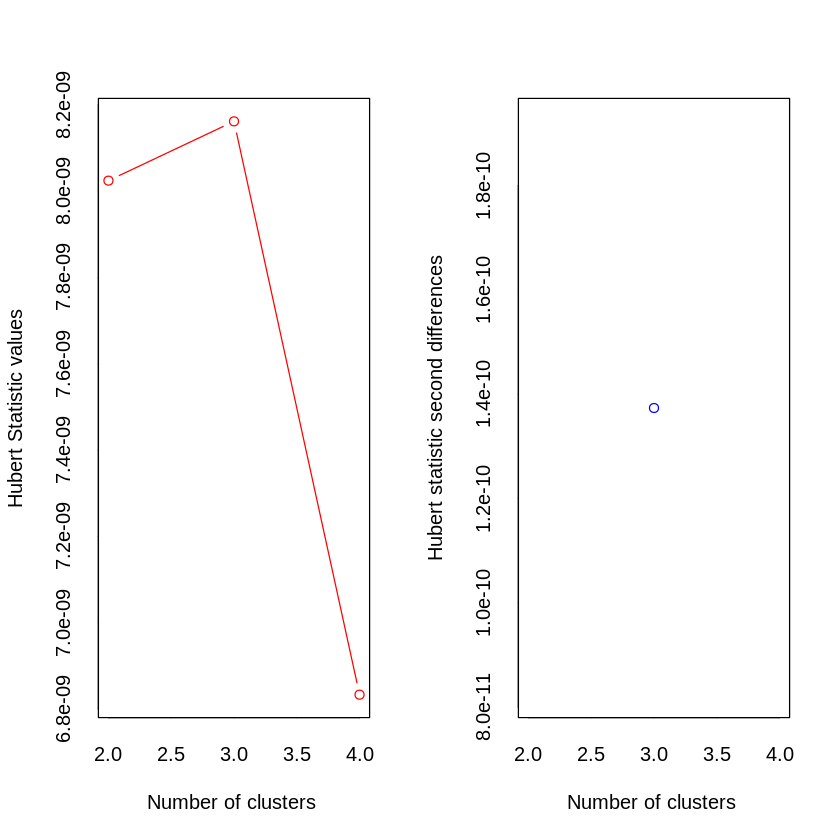

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 2 as the best number of clusters 
* 7 proposed 3 as the best number of clusters 
* 9 proposed 4 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


$All.index
       KL       CH  Hartigan      CCC    Scott      Marriot       TrCovW
2 75.1052 334.3356   11.5464   9.8341 4861.224 3.998159e+17 7.833156e+14
3  0.0097 176.0342 1417.1319 -28.5624 5302.353 4.143303e+17 7.526703e+14
4 74.8595 882.0047   27.7667 -24.7775 6185.081 1.561255e+17 5.339800e+13
     TraceW Friedman   Rubin Cindex     DB Silhouette   Duda  Pseudot2    Beale
2 161467038 138768.3  5.9149 0.2318 0.5263     0.6909 3.3693  -12.6576 -14.0861
3 158244550 139892.9  6.0354 0.2465 0.4184     0.6743 0.2621 1539.6171  59.4053
4  45164124 144761.6 21.1466 0.2041 0.5376     0.6724 0.5759   12.5185  14.7053
  Ratkowsky     Ball Ptbiserial   Frey McClain   Dunn Hubert SDindex   Dindex
2    0.1839 80733519     0.6401 3.9359  0.0186 0.0705      0  0.0026 423.5748
3    0.1560 52748183     0.6404 3.3482  0.0186 0.0747      0  0.0021 420.1651
4    0.2265 11291031     0.7625 1.7698  0.1315 0.0412      0  0.0028 233.4819
    SDbw
2 0.9538
3 0.4631
4 0.2933

$All.CriticalValues
  CritValue_Duda CritValue_PseudoT2 Fvalue_Beale
2         0.7965             4.5977            1
3         0.9440            32.4516            0
4         0.7918             4.4699            0

$Best.nc
                     KL       CH Hartigan    CCC   Scott       Marriot
Number_clusters  2.0000   4.0000    3.000 2.0000   4.000  3.000000e+00
Value_Index     75.1052 882.0047 1405.585 9.8341 882.728 -2.727192e+17
                      TrCovW     TraceW Friedman   Rubin Cindex     DB
Number_clusters 4.000000e+00          3    4.000  3.0000 4.0000 3.0000
Value_Index     6.992723e+14 -109857938 4868.729 14.9908 0.2041 0.4184
                Silhouette   Duda PseudoT2    Beale Ratkowsky     Ball
Number_clusters     2.0000 2.0000   2.0000   2.0000    4.0000        4
Value_Index         0.6909 3.3693 -12.6576 -14.0861    0.2265 41457152
                PtBiserial Frey McClain   Dunn Hubert SDindex Dindex   SDbw
Number_clusters     4.0000   NA  2.0000 3.0000      0  3.0000      0 4.0000
Value_Index         0.7625   NA  0.0186 0.0747      0  0.0021      0 0.2933

$Best.partition
  [1] 1 1 1 2 1 2 1 2 2 2 2 1 1 2 2 2 2 1 3 2 2 2 2 3 1 1 2 1 1 1 1 2 1 1 1 1 2
 [38] 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2
 [75] 2 1 2 1 1 2 2 2 3 1 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2
[112] 2 2 2 2 2 2 2 1 1 2 1 3 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 2 3 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 3 1 1 2 2
[186] 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 3 2 2 2 2 1 2 2 1 2 3 2 2 2 2 2 1 3 2 2
[223] 2 2 2 2 2 2 2 2 1 2 2 1 2 2 3 1 2 1 2 2 2 2 1 2 2 2 2 2 1 2 1 1 1 2 1 2 1
[260] 2 1 1 1 2 1 3 2 2 2 2 2 2 3 2 1 2 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2
[334] 2 2 1 2 1 2 3 2 2 2 1 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 3 3
[371] 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2
[408] 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2
[445] 1 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 1 4 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
[482] 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 1 1
[519] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[556] 2 2 2 2 2 2 2 2 1 1 1 2 1 2

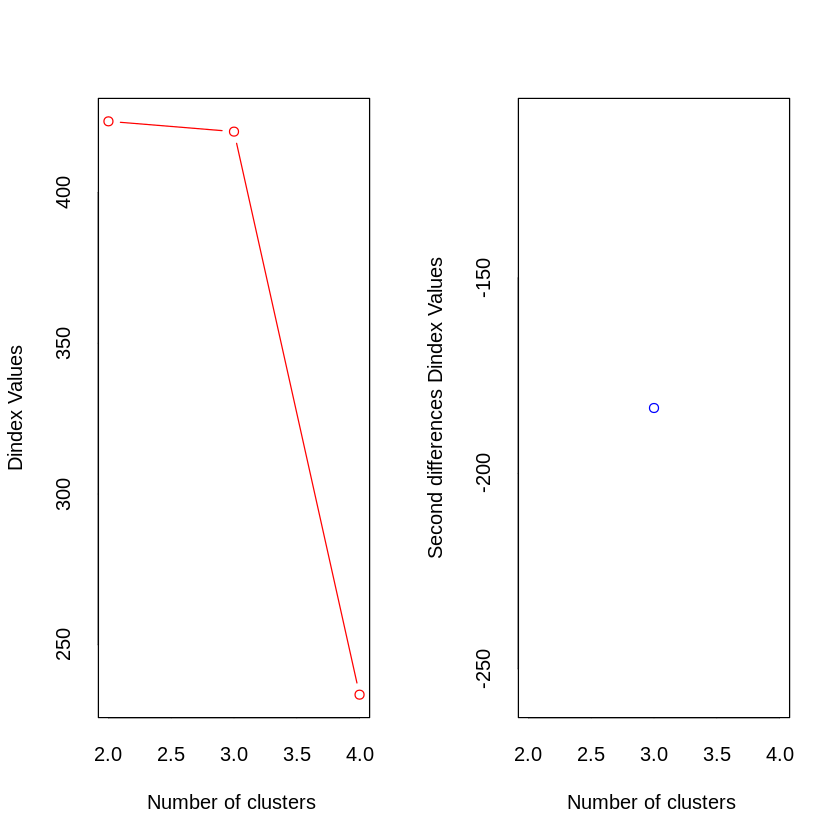

In [27]:
NbClust::NbClust(data[,-1], distance="euclidean", min.nc=2, max.nc=4,
method="complete", index="all")

Interestingly, majority of methods suggested the larger number of output classes, but this is not an
unambiguous indication; however, it should be taken into account when analyzing the results of the
modeling and predictions.

## Data imbalance

Four different possibilities are presented to deal with data imbalance and to prepare “improved” datasets:

### DownSample

In [36]:

dataB1 <- caret::downSample(x = data[,-1], y = data$Diagnosis)
dim(dataB1)

Warning message in caret::downSample(x = data[, -1], y = data$Diagnosis):
“Down-sampling requires a factor variable as the response. The original data was returned.”


NULL

dataB1 would have 424 observations (2 times maller than the class - ”malignant”(212)).

### UpSample

In [14]:
dataB2 <- caret::upSample(x = data[,-1], y = data$Diagnosis)
dim(dataB2)


[1] 714  31

dataB2 have 714 observations which is  (2 times larger than - ”benign” class).

### ROSE

In [37]:
dataB3 <- ROSE::ROSE(Diagnosis ~ ., data = data)$data
dim(dataB3)
table(dataB3$Diagnosis)

[1] 569  31


  1   2 
278 291 

In the dataB3, there will be 569 observations (the same as in the original set), but more balanced - 296
"benign" observations and 273 "malignant" ones.

### SMOTE (Synthetic Minority Over-sampling Technique)

In [16]:
dataB4 <- DMwR::SMOTE(Diagnosis ~ ., data = data)
dim(dataB4)
table(dataB4$Diagnosis)

[1] 1484   31


  B   M 
848 636 

In the dataB4, there will be 1484 observations (more than in the original set), still slightly better balanced -
848 "benign" observations (57.1%) and 636 "malignant" ones (42.9%)

## Data Division

The data is splitted  into training and testing sets.

In [38]:
# The original data is splitted into 60% of training and the remaining as testing
set.seed(1)
ind1 <- caret::createDataPartition(data$Diagnosis, p = 0.6,
list=FALSE)
train1 <- data[ind1,]
test1 <- data[-ind1,]

#The ROSE adopted darta is splitted into 60% of training and the remaining as testing for comparison

set.seed(2)
ind2 <- caret::createDataPartition(dataB3$Diagnosis, p = 0.6,
list=FALSE)
train2 <- dataB3[ind2,]
test2 <- dataB3[-ind2,]

## Modeling

In [18]:
models1 <- lapply(c('svmRadial', 'rf', 'knn', 'rpart'),
function(met){
caret::train(Diagnosis ~ ., method=met, data=train1)})

models2 <- lapply(c('svmRadial', 'rf', 'knn', 'rpart'),
function(met){
caret::train(Diagnosis ~ ., method=met, data=train2)})

## Model evaluation

In [19]:
pred1a <- predict(models1[[1]], test1)
pred1b <- predict(models1[[2]], test1)
pred1c <- predict(models1[[3]], test1)
pred1d <- predict(models1[[4]], test1)

pred2a <- predict(models2[[1]], test2)
pred2b <- predict(models2[[2]], test2)
pred2c <- predict(models2[[3]], test2)
pred2d <- predict(models2[[4]], test2)

caret::confusionMatrix(pred1a, test1$Diagnosis)
caret::confusionMatrix(pred1b, test1$Diagnosis)
caret::confusionMatrix(pred1c, test1$Diagnosis)
caret::confusionMatrix(pred1d, test1$Diagnosis)

caret::confusionMatrix(pred2a, test2$Diagnosis)
caret::confusionMatrix(pred2b, test2$Diagnosis)
caret::confusionMatrix(pred2c, test2$Diagnosis)
caret::confusionMatrix(pred2d, test2$Diagnosis)


Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 140   1
         M   2  83
                                          
               Accuracy : 0.9867          
                 95% CI : (0.9617, 0.9973)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9716          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9859          
            Specificity : 0.9881          
         Pos Pred Value : 0.9929          
         Neg Pred Value : 0.9765          
             Prevalence : 0.6283          
         Detection Rate : 0.6195          
   Detection Prevalence : 0.6239          
      Balanced Accuracy : 0.9870          
                                          
       'Positive' Class : B               
                              

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 137   3
         M   5  81
                                          
               Accuracy : 0.9646          
                 95% CI : (0.9314, 0.9846)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9246          
                                          
 Mcnemar's Test P-Value : 0.7237          
                                          
            Sensitivity : 0.9648          
            Specificity : 0.9643          
         Pos Pred Value : 0.9786          
         Neg Pred Value : 0.9419          
             Prevalence : 0.6283          
         Detection Rate : 0.6062          
   Detection Prevalence : 0.6195          
      Balanced Accuracy : 0.9645          
                                          
       'Positive' Class : B               
                              

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 136   8
         M   6  76
                                          
               Accuracy : 0.9381          
                 95% CI : (0.8982, 0.9657)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8667          
                                          
 Mcnemar's Test P-Value : 0.7893          
                                          
            Sensitivity : 0.9577          
            Specificity : 0.9048          
         Pos Pred Value : 0.9444          
         Neg Pred Value : 0.9268          
             Prevalence : 0.6283          
         Detection Rate : 0.6018          
   Detection Prevalence : 0.6372          
      Balanced Accuracy : 0.9313          
                                          
       'Positive' Class : B               
                              

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 127   8
         M  15  76
                                          
               Accuracy : 0.8982          
                 95% CI : (0.8512, 0.9344)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7858          
                                          
 Mcnemar's Test P-Value : 0.2109          
                                          
            Sensitivity : 0.8944          
            Specificity : 0.9048          
         Pos Pred Value : 0.9407          
         Neg Pred Value : 0.8352          
             Prevalence : 0.6283          
         Detection Rate : 0.5619          
   Detection Prevalence : 0.5973          
      Balanced Accuracy : 0.8996          
                                          
       'Positive' Class : B               
                              

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 111   8
         M   4 104
                                          
               Accuracy : 0.9471          
                 95% CI : (0.9095, 0.9724)
    No Information Rate : 0.5066          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8942          
                                          
 Mcnemar's Test P-Value : 0.3865          
                                          
            Sensitivity : 0.9652          
            Specificity : 0.9286          
         Pos Pred Value : 0.9328          
         Neg Pred Value : 0.9630          
             Prevalence : 0.5066          
         Detection Rate : 0.4890          
   Detection Prevalence : 0.5242          
      Balanced Accuracy : 0.9469          
                                          
       'Positive' Class : B               
                              

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 110   2
         M   5 110
                                          
               Accuracy : 0.9692          
                 95% CI : (0.9375, 0.9875)
    No Information Rate : 0.5066          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9383          
                                          
 Mcnemar's Test P-Value : 0.4497          
                                          
            Sensitivity : 0.9565          
            Specificity : 0.9821          
         Pos Pred Value : 0.9821          
         Neg Pred Value : 0.9565          
             Prevalence : 0.5066          
         Detection Rate : 0.4846          
   Detection Prevalence : 0.4934          
      Balanced Accuracy : 0.9693          
                                          
       'Positive' Class : B               
                              

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 112  20
         M   3  92
                                          
               Accuracy : 0.8987          
                 95% CI : (0.8519, 0.9347)
    No Information Rate : 0.5066          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7969          
                                          
 Mcnemar's Test P-Value : 0.0008492       
                                          
            Sensitivity : 0.9739          
            Specificity : 0.8214          
         Pos Pred Value : 0.8485          
         Neg Pred Value : 0.9684          
             Prevalence : 0.5066          
         Detection Rate : 0.4934          
   Detection Prevalence : 0.5815          
      Balanced Accuracy : 0.8977          
                                          
       'Positive' Class : B               
                              

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 104  16
         M  11  96
                                          
               Accuracy : 0.8811          
                 95% CI : (0.8317, 0.9201)
    No Information Rate : 0.5066          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7619          
                                          
 Mcnemar's Test P-Value : 0.4414          
                                          
            Sensitivity : 0.9043          
            Specificity : 0.8571          
         Pos Pred Value : 0.8667          
         Neg Pred Value : 0.8972          
             Prevalence : 0.5066          
         Detection Rate : 0.4581          
   Detection Prevalence : 0.5286          
      Balanced Accuracy : 0.8807          
                                          
       'Positive' Class : B               
                              

Only 8 observations were wrongly predicted. Balanced accuracy is very close to the regular Accuracy,
which suggests, the model is well fitted to the data (both classes of the output)

## Neural Network

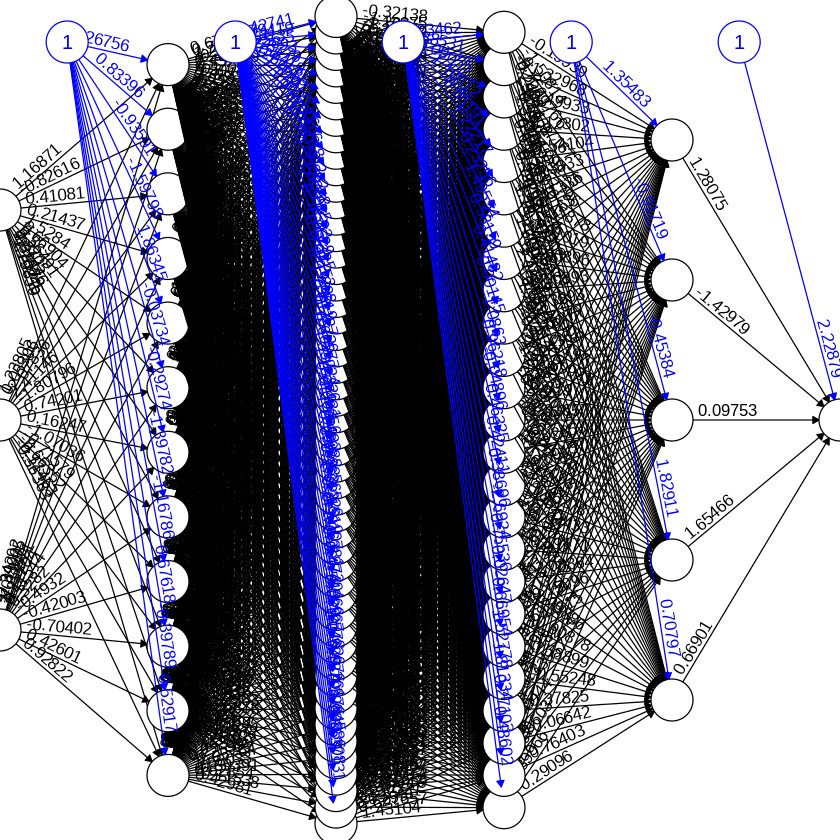

In [53]:
model <- neuralnet::neuralnet(Diagnosis ~ AreaWL + ConcPointsWL +
RadiusWL, data = train2, hidden = c(12,50,25, 5 ),
learningrate = 0.001, linear.output = FALSE,
algorithm = "backprop", rep = 3, act.fct = "tanh")
plot(model, rep = "best")


### Evaluate the neural network model

In [58]:
predictions <- predict(model, newdata = test2, type = "class")
conf_matrix <- table(predictions, test2$Diagnosis)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

print(conf_matrix)

                   
predictions           1   2
  0.997656630599125   0   2
  0.999780973414649   0   1
  0.999987407697147 112 112


## Automatic tuning

In the SVM analysis presented earlier, a radial kernel obtained relatively good prediction results. Hence, the hyperparameters of SVM are tuned as follows.

In [41]:
tuned_svm <- e1071::tune(svm, Diagnosis ~ ., data = train2,
kernel = "radial",
ranges = list(gamma = 2^(-2:2)))
print(tuned_svm)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma
  0.25

- best performance: 0.1577341 



The graph of support vectors distribution can be made using the code presented below. Only two input
parameters were chosen to enable 2D presentation

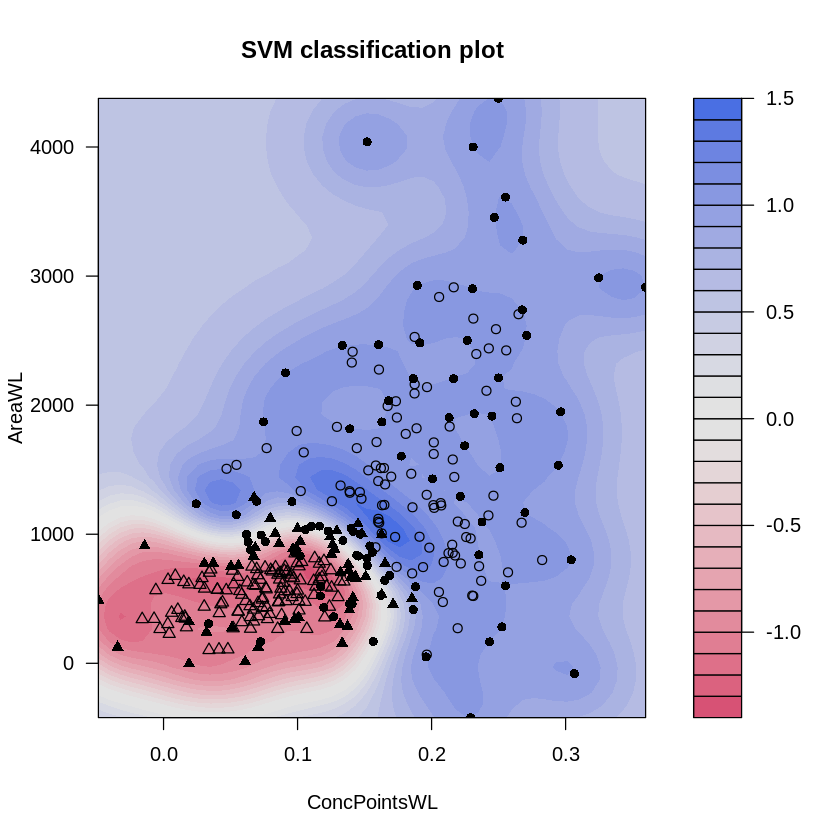

In [43]:
model_svm <- kernlab::ksvm(Diagnosis ~ AreaWL + ConcPointsWL,
data = train2, type="C-svc", kernel = "rbfdot")
plot(model_svm, data = train2)

## Conclusion

In this project, most of the machine learning concepts are addressed. In the coming session, the hyperparameter tuning and optimization will be discussed in detail.